In [2]:
import numpy as num
import pandas as pan
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy as sp 
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import datasets
import itertools

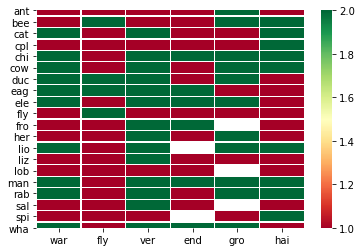

In [3]:
data = pan.read_csv('C:\\Users\\PYTON\\Desktop\\git_repo\\lsed\\zad7\\animals.csv', sep=",")

#heatmap
ax = sb.heatmap(data, linewidths=.2, cmap = "RdYlGn")
plt.show()

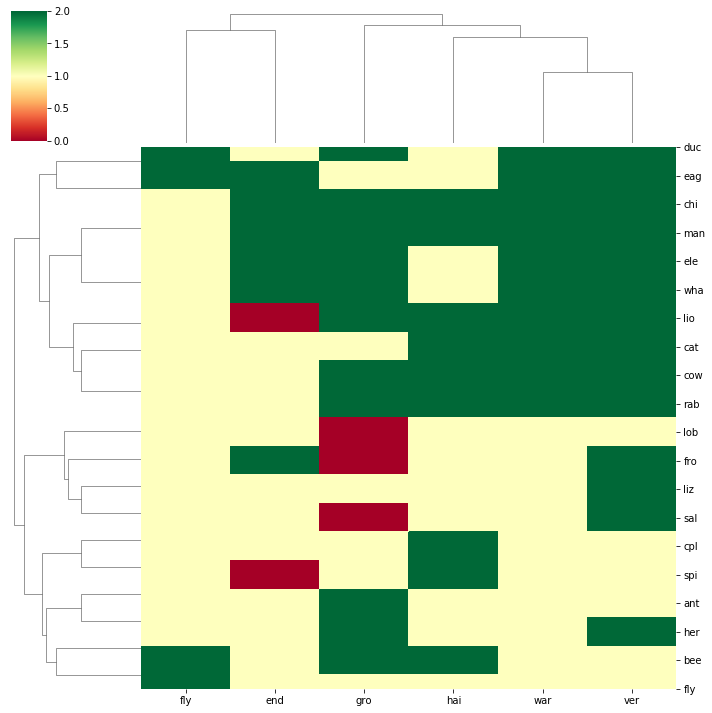

In [4]:
data.fillna(0, inplace = True)
sb.clustermap(data, cmap="RdYlGn")

In [3]:
#wczytanie irys'a
iris = datasets.load_iris()
X = iris.data
y = iris.target

#przerobienie iris na dataFrame
iris_data = pan.DataFrame(data = num.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
#print(iris_data)

In [4]:
test = (0,1,2,3)
all_comb = []
#kombinacje zmiennych (max 4)
for i in range(5):
    comb_obj = itertools.combinations(test, i)
    comb_list = list(comb_obj)
    all_comb += comb_list

#lista wszystkich kombinacji zmiennych
all_comb = all_comb[5:]
print(all_comb)

doubles = all_comb[:6]
#print(doubles)
triples = all_comb[6:10]
#print(triples)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)]


In [5]:
doubles_score = []
#kmeans dla kombinacji dwóch kolumn
for i in range(len(doubles)):
    #print(doubles[i])
    tmp = doubles[i]
    n1 = tmp[0]
    n2 = tmp[1]
    df1 = iris_data.iloc[:,[n1,n2]]
    #print(df1)
    kmeans = KMeans(n_clusters = 3).fit(df1)
    doubles_score.append(kmeans.score(df1))

triples_score = []
#kmeans dla kombinacji trzech kolumn
for i in range(len(triples)):
    tmp = triples[i]
    n1 = tmp[0]
    n2 = tmp[1]
    n3 = tmp[2]
    df1 = iris_data.iloc[:,[n1,n2,n3]]
    kmeans = KMeans(n_clusters = 3).fit(df1)
    triples_score.append(kmeans.score(df1))

#kmeans dla calego zbioru
full_score = []
kmeans = KMeans(n_clusters = 3).fit(iris_data)
full_score = kmeans.score(iris_data)

#zebranie wynikow razem
score = num.hstack((doubles_score, triples_score, full_score))

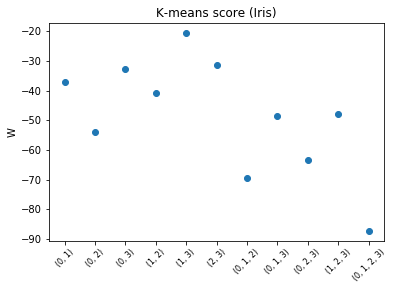

In [6]:
#wykres (o dziwo najlepiej dziala dla calego zbioru danych)
plt.scatter(num.arange(len(all_comb)), score)
plt.ylabel('W')
plt.xticks(num.arange(len(all_comb)), all_comb, rotation = 45, fontsize = 8)
plt.title('K-means score (Iris)')
plt.show()